# Bias

<p style="line-height:1.75;font-size:16px">
According to Wikipedia "Bias is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).” Essentialy, bias is the difference between our model's average prediction and the correct value we're trying to predict. A model with high bias pays little attention to the training data and is usually oversimplified. This leads to high error on both train and test data and we say the the model is underfitting (more on that later).<br>
That being said, a machine learning algorithm has to make <u>some</u> assumptions about that data in order to be effective. Without <u>some</u> bias in our model it would have a hard time generalizing and won't be very useful.<br>
<b>Low Bias</b>: Weak assumptions regarding the functional form of the mapping of inputs to outputs.<br>
<b>High Bias</b>: Strong assumptions regarding the functional form of the mapping of inputs to outputs.

# Variance

<p style="line-height:1.75;font-size:16px">
A type of error that occurs due to a model's sensitivity to small fluctuations in the training set.<br>
<b>Low Variance</b>: Suggest changes in the training data lead to small changes in the estimate of the target function.<br>
<b>High Variance</b>: Suggests changes in the training data lead to larger changes in the estimates of the target function. This is also referred to as overfitting.

# Bias and Variance Visualized

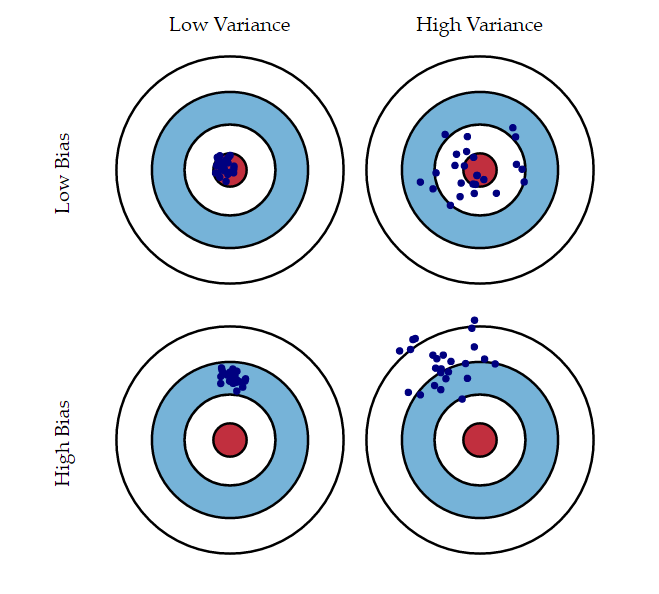

# Bias-Variance Tradeoff

<p style="line-height:1.75;font-size:16px">
Bias and variance are usually are often at odds and decreasing one often means you increase the other - that's the tradeoff. Let's visualize this using an image:

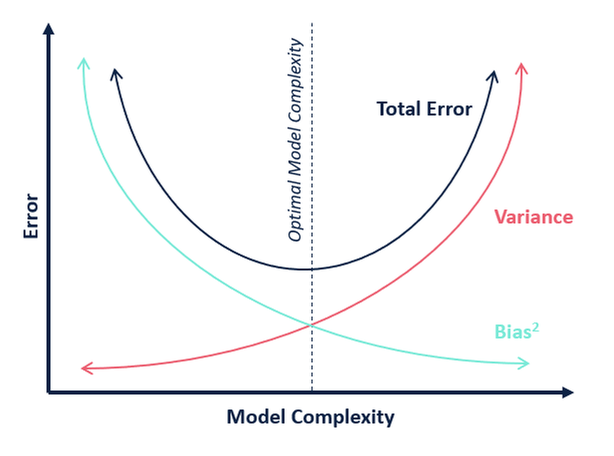

<p style="line-height:1.75;font-size:16px">
If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. We need to find the right balance without overfitting or underfitting the data.

# Overfitting and Underfitting Visualized

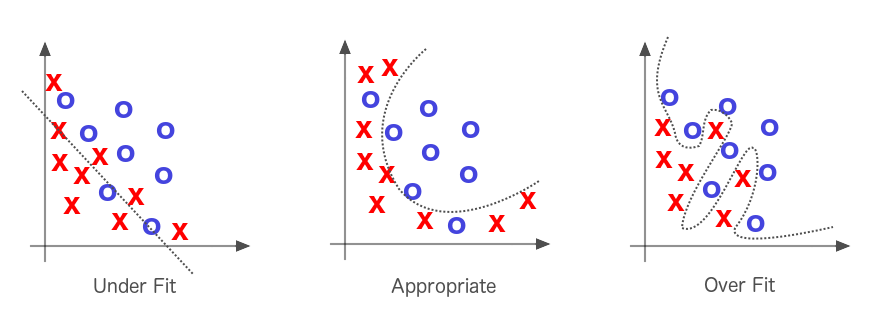

# Overfitting

## The Problem

<p style="line-height:1.75;font-size:16px">
One easy way to understand supervised machine learning and the issues it involved with it is to consider the task as: approximating a target function $f$ that maps input variables $X$ to an output variable $y$. We can view this a classification algorithm where we need to predict class $y$ for variables $X$ using function $f$.
<p style="line-height:1.75;font-size:16px">
<center><h3>
$y=f(X)$
</h3>
<p style="line-height:1.75;font-size:16px">


<p style="line-height:1.75;font-size:16px">
An important point to consider when learning a target function from training data is how well the model generalizes to new data. This is a key aspect since the sample data we collect is usually noisy and incomplete. Let's look at a small example to get a better intuition.<br>

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
Golden Sand beach is known to be one of the best beaches in the world but it has one problem - sharks (and dolphins) like to visit there as well. You were given the task of making sure the beach is safe and that there are no sharks around (dolphins are ok). To do this, you're trying to build a classifier that will classify sharks and dolphins based on their length. Being a dilligent researcher, you went out and measured the length of 20 dolphins and 10 sharks. Your findings look like this:<br>
</p></div>

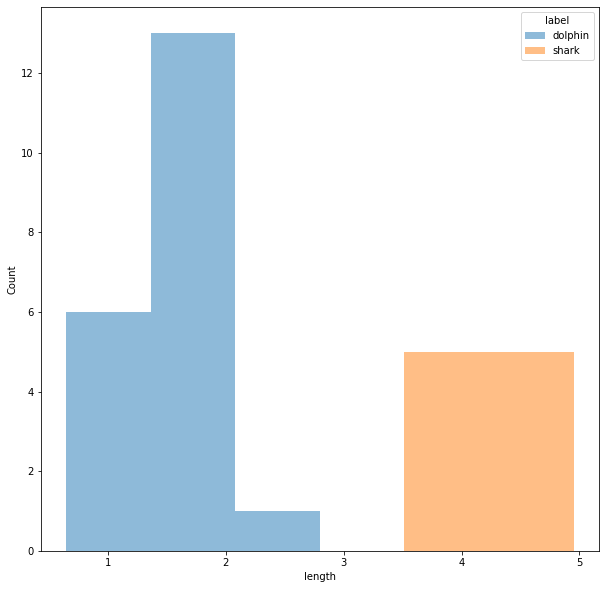

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data/shark_or_dolphin_overfitting.csv')
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=data, x='length', hue='label', stat='count', edgecolor=None)
plt.show()

<p style="line-height:1.75;font-size:16px">
"Eureka!" you cry out - the solution is quite simple:
<p style="line-height:1.75;font-size:16px">
<center><h3>
$if~length>3~then~shark~else~dolphin$
</h3>
<p style="line-height:1.75;font-size:16px">
You verify your results by calculating your model's accuracy:

In [124]:
data['prediction'] = data['length'].apply(lambda x: 'shark' if x > 3 else 'dolphin')
correct = sum(data['prediction'] == data['label'])
print(f'Number of correct predictions: {correct}')
print(f'Accuracy: {(correct/len(data) * 100):.1f}%')

Number of correct predictions: 30
Accuracy: 100.0%


<p style="line-height:1.75;font-size:16px">
You are pleased with your result and start using the model that very day. However, after the 3rd shark you model didn't detect, you're starting to think something is wrong. You assume the problem is with the data you collected so you ask fellow researchers to send you their data as well. You use your exisiting model to calculate its accuracy on the new data:

In [125]:
data = pd.read_csv('data/shark_or_dolphin.csv')

data['prediction'] = data['length'].apply(lambda x: 'shark' if x > 3 else 'dolphin')
correct = sum(data['prediction'] == data['label'])
print(f'Number of correct predictions: {correct}')
print(f'Accuracy: {(correct/len(data) * 100):.1f}%')

Number of correct predictions: 1773
Accuracy: 88.6%


<p style="line-height:1.75;font-size:16px">
You plot another historgram and things become clearer.

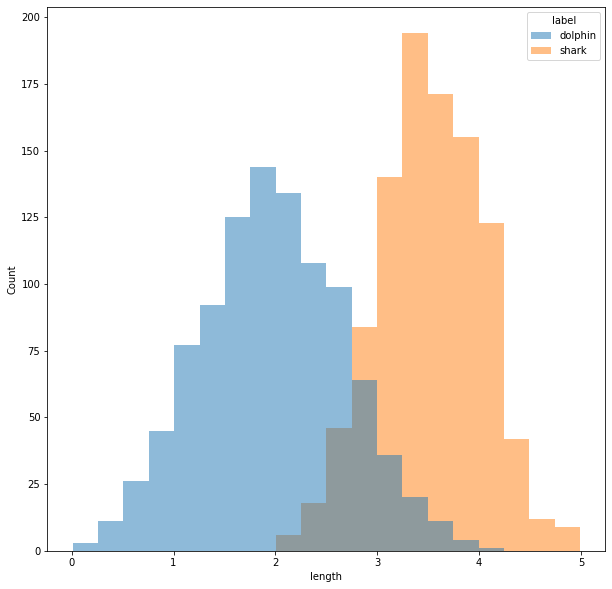

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=data, x='length', hue='label', stat='count', edgecolor=None)
plt.show()

<p style="line-height:1.75;font-size:16px">
Your initial model hadn't seen any examples of sharks shorter than 3m (or dolphins longer than 3m for that matter) so it did not perform (generalize) well when it encountered such examples.

## Common Reasons for Overfitting

<p style="line-height:1.75;font-size:16px">
<b>Data isn't representative</b><br>
If we have too few samples or if the samples' distribution isn't similar to the population's distribution, we might end up with a model that learned to perform well on this data but will fail when it encounters unseen data.<p>
<p style="line-height:1.75;font-size:16px">
<b>Model is too complex</b><br>
Models try to achieve the best performance they can on the training data by any means necessary. Sometimes, a very complex model is able to memorize the entire training set - thus having great performance. However, if it encounters a new sample that it doesn't have in memory it will likely fail. 
<p>
<p style="line-height:1.75;font-size:16px">
<b>Data is noisy</b><br>
In machine learning we try to filter out the signal from the noise. If our data is too noisy, a flexible model might just 'learn the noise' instead of the signal.

## Identifying Overfitting

<p style="line-height:1.75;font-size:16px">
We know that overfit models perform well on the training data but less so on unseen (test) data. So one way to asses overfitting is by comparing the model peformance on the train data and on the test data. We usually do this anyway since we split our data into train/validation/test. Another common method, which also relies on splitting the data, is cross validation. The question of how much of a difference between the data sets is considered overfitting is debateable and usually depends on the data we're dealing with and the model we're training.

## Reducing Overfitting

<p style="line-height:1.75;font-size:16px">
While overfitting is a common issue we'll encounter on a daily basis, there are ways to reduce it.
<p style="line-height:1.75;font-size:16px">
<b>Add more data</b><br>
Having more data usually means that the model sees more examples and is therefore better at detecting the signal and generalizing.
<p style="line-height:1.75;font-size:16px">
<b>Remove features</b><br>
If our model tries to learn too many features from our input data it might just be learning a lot of irrelevant noise. For example, if I'm trying to build a model the classifies cars by their type, it might be irrelevant to use color as a feature. 
<p style="line-height:1.75;font-size:16px">
<b>Cross validation</b><br>
Cross validation doesn't reduce overfitting per se but it does help us compare different models and choose the correct parameters that result in less overfitting.
<p style="line-height:1.75;font-size:16px">
<b>Regularization</b><br>
Regularization forces a model to avoid complexity by adding a regularization term to its cost function thereby penalizing it for having coefficients that are too larger (more on that later in this notebook).
<p style="line-height:1.75;font-size:16px">
<b>Early stopping</b><br>
Early stopping is used when we have an iterative learner (such as gradient descent) where in each iteration the learner tries to better fit the data. Too many iterations can lead to overfitting so we use early stopping to determine how many iterations we need to run before the learner starts to overfit (this method is mostly used in deep learning).

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:16px"><b>Feature Selection</b></span><br>
<span style="font-size:16px">
Feature selection is topic that comes up alot in machine learning and <a href=https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/>this post</a> does a good job at explaining it. 
</p></div>


# Underfitting

## The Problem

<p style="line-height:1.75;font-size:16px">
In a sentence, underfitting is the term used to describe a scenario where the model doesn't perform well on the <b>training</b> data. Let's run through a quick example to see exactly what underfitting means.

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
After solving the shark problem at the Golden Sand beach you realise it would be nice to buy house there and retire. Being a data scientist at heart, you decide to collect historical data that will help you determine what price you should pay. Looking at your features, you decide to use the total number of bedrooms in order to estimate the house value.<br>
</p></div>

In [127]:
housing = pd.read_csv('data/housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

housing.dropna(inplace=True)
housing_train, housing_test = train_test_split(housing, train_size=0.8)
lr = LinearRegression()
lr.fit(housing_train[['total_bedrooms']], housing_train[['median_house_value']])
score = lr.score(X=housing_train[['total_bedrooms']], y=housing_train[['median_house_value']])
print(f'R2: {score}')

R2: 0.0023332539177081113


<p style="line-height:1.75;font-size:16px">
The R2 score is very low. Remembering what you learned about underfitting, you decide that your model is too simple and instead of using just that total bedrooms as a feature you train a new model with all of the available features.

In [129]:
lr.fit(housing_train.drop(['median_house_value', 'ocean_proximity'], axis=1), housing_train[['median_house_value']])
score = lr.score(X=housing_train.drop(['median_house_value', 'ocean_proximity'], axis=1), y=housing_train[['median_house_value']])
print(f'R2: {score}')

R2: 0.6370439147544886


<p style="line-height:1.75;font-size:16px">
That's a huge improvement! More confident than ever, you go to the realtor's office to buy your new house.<br>
<b><u>NOTE</u></b>: This is <b><u>not</u></b> a good approach to building a regression model but was simply used to illustrate the concept of underfitting.

## Common Reasons for Underfitting

<p style="line-height:1.75;font-size:16px">
<b>Model isn't complex enough</b><br>
If our data has a lot of features our model may be too simple and not have the capacity to learn them. <p>
<p style="line-height:1.75;font-size:16px">
<b>Model is too regularized</b><br>
In an attempt to avoid overfitting, we might have regularized the model too much and brought it to the point where it is too simple.
<p>
<p style="line-height:1.75;font-size:16px">
<b>Data has no inherent pattern</b><br>
Sometimes, the data we have is simply not enough in order to build the model we want. For instance, if we only have a person's gender, it's going to be pretty hard to predict the weight of that person.
<p>

## Identifying Underfitting

<p style="line-height:1.75;font-size:16px">
Identifying underfitting is pretty straightforward - you're going to see poor performance on your training data.

## Improving Underfitting

<p style="line-height:1.75;font-size:16px">
<b>Collect better data</b><br>
If you've tried several different models and none of them seem to work you might just have an issue with the data you're using. If possible, collect better data. 
<p style="line-height:1.75;font-size:16px">
<b>Feature engineering</b><br>
Feeding the model our raw data is sometimes not enough. You might need to create (engineer) new features that will help the model learn the signal better.
<p style="line-height:1.75;font-size:16px">
<b>Reduce regularization</b><br>
If you have a regularization mechanism in place, try to reduce is weight so that the model is not penalized too much.

# Regularization

<p style="line-height:1.75;font-size:16px">
Regularization is a technique used to reduce the error by fitting a function appropriately on the given training set and avoiding overfitting. It does this by adding an additional penalty term in the error function. The additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values. Let's look see how it would look in the general case: 
</p><p><center><h3>
$Loss=Error(y,\hat{y})$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
Then, when you add regularization it will look something like this:
</p><p><center><h3>
$Loss=Error(y,\hat{y})+penalty$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
To better understand how this works, let's look at linear regression for example.<br>
The loss for linear regression can be written as:
</p><p><center><h3>
$Loss=(y_i-\hat{y}_i)^2$
</h3>
<p style="line-height:1.75;font-size:16px">
Now, we can add a penalty term:
<center><h3>
$Loss_{Regularized}=(y_i-\hat{y}_i)^2+penalty$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
Which we can also write as:
<center><h3>
$Loss_{Regularized}=(y_i-(\beta_0+\beta_1x))^2+penalty$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
This penalty will obviously increase the square error but how will it reduce overfitting? To answer that, let's look at the two most common regularization methods.


## L2 Regularization (Ridge Regression)

<p style="line-height:1.75;font-size:16px">
The L2 regularization takes it's name from the L2 norm of a vector. The L2 norm is defined as:
<center><h3>
$\lVert w\rVert_2=(w_1^2+w_2^2+...+w_n^2)^\frac{1}{2}$
</h3>
</center>

<p style="line-height:1.75;font-size:16px">
The penalty in this case will be the the squared magnitude of the coefficients multiplied by $\lambda$ (which lets us control the amount of regularization):
<center><h3>
$Loss_{L2}=(y_i-(\beta_0+\beta_1x))^2+\lambda\beta_1^2$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
And in the more general case:
<center><h3>
$Loss_{L2}=(y_i-(\sum\limits_{i=1}^{n}\beta_0+\beta_ix_i))^2+\lambda\sum\limits_{i=1}^{n}\beta_i^2$
</h3>
</center>

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
What will happen to the coefficients when we use L2 regularization? How will that help with overfitting?<br>
</p></div>

<p style="line-height:1.75;font-size:16px">
Since our objective is to minimize the loss, we will try to have the smallest coefficients possible while still giveing good predictions. How does that help with overfitting? The smaller coeffiecients produce less complex models which in turn increases the bias but reduces the variance. One disadvantage of ridge regression is that it can only decrease the value of the coefficients but never fully remove them (give the a value of 0).

In [130]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np
%matplotlib inline

def plot_line(a=1):
    fig = plt.figure(figsize=(15,8))
    ax = fig.gca()
    plt.ylim(-30, 100)
    x_vals = np.linspace(-2, 5, 100)
    y_vals = [-a*x**4 + a*7*x**3 - a*x**2 - a*31*x + a*30 for x in x_vals]
    ax.plot(x_vals, y_vals, c='r')
    plt.show()
    
interact(plot_line, a=(0,3,0.05))

A Jupyter Widget

<function __main__.plot_line>

<p style="line-height:1.75;font-size:16px">
In order to use L2 regularization in our code we simply use the `Ridge` model like so:

In [131]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_informative=5, noise=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [132]:
# In sklearn the gamma we saw earlier is called alpha
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)
print(f'Train: {ridge.score(X_train, y_train)}')
print(f'Test: {ridge.score(X_test, y_test)}')

Train: 0.9991760619383134
Test: 0.9989956580378708


In [133]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=3)

lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)

lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

rr_train_score = rr.score(X_train,y_train)
rr_test_score = rr.score(X_test, y_test)

rr100_train_score = rr100.score(X_train,y_train)
rr100_test_score = rr100.score(X_test, y_test)


print('Linear Regression')
print(f'Train: {lr_train_score}, Test: {lr_test_score}')
print(lr.coef_)
print('\n')
print('Ridge Regression (alpha=0.01)')
print(f'Train: {rr_train_score}, Test: {rr_test_score}')
print(rr.coef_)
print('\n')
print('Ridge Regression (alpha=100)')
print(f'Train: {rr100_train_score}, Test: {rr100_test_score}')
print(rr100.coef_)

Linear Regression
Train: 0.7419034960343789, Test: 0.7147895265576866
[-1.28899229e-01  4.62536564e-02 -5.41974027e-02  3.83208843e+00
 -1.24514995e+01  3.72790367e+00  7.37824474e-03 -1.19551784e+00
  2.80152377e-01 -7.75364999e-03 -8.27122705e-01  1.25331573e-02
 -5.56644117e-01]


Ridge Regression (alpha=0.01)
Train: 0.7419030253527293, Test: 0.7146125373123907
[-1.28869508e-01  4.62616037e-02 -5.46734649e-02  3.82991200e+00
 -1.23346502e+01  3.72939688e+00  7.27044718e-03 -1.19369533e+00
  2.79812365e-01 -7.75637125e-03 -8.25725742e-01  1.25406308e-02
 -5.56819788e-01]


Ridge Regression (alpha=100)
Train: 0.7172809669938278, Test: 0.6805765856921941
[-0.11973214  0.0571583  -0.10448294  0.74655991 -0.13349626  1.93180691
  0.01453469 -0.95470769  0.29564552 -0.01059791 -0.76014483  0.01180499
 -0.71980859]


## L1 Regularization (LASSO Regression)


<p style="line-height:1.75;font-size:16px">
The L1 regularization takes it's name from the L1 norm of a vector. The L1 norm is defined as:
<center><h3>
$\lVert w\rVert_1=\left|w_1\right|+\left|w_2\right|+...+\left|w_n\right|$
</h3>
</center>

<p style="line-height:1.75;font-size:16px">
Similarly to L2 regularization, we also add a regularization term to the loss function but in the L1 case the term is the absolute values of the coefficients:
<center><h3>
$Loss_{L1}=(y_i-(\sum\limits_{i=1}^{n}\beta_0+\beta_ix_i))^2+\lambda\sum\limits_{i=1}^{n}\left|\beta_i\right|$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
One major difference between ridge and lasso is that while ridge makes the coeffiecients smaller, lasso can actually shrink them all the way to 0 - thus becoming a useful feature selection tool. One disadvantage of lasso is that it will only choose the top $n$ predictors (features) when $p$ >> $n$ ($n$ is the number of samples). Also, if two or more predictors are correlated, it will usually randomly choose one of them to be included. <br>
You can use lasso regression by importing it from:

In [134]:
from sklearn.linear_model import Lasso

## Elastic Net Regularization

<p style="line-height:1.75;font-size:16px">
Elastic net regularization tries to incorporate the best of ridge and lasso regularization.
<center><h3>
$Loss_{elastic~net}=(y_i-(\sum\limits_{i=1}^{n}\beta_0+\beta_ix_i))^2+\alpha\left(\lambda\sum\limits_{i=1}^{n}\left|\beta_i\right|+(1-\lambda)\sum\limits_{i=1}^{n}\beta_i^2\right)$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
Using elastic net we can overcome the disadvantages of lasso and ridge regularization.

In [5]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Run the 4 types of regressions we talked about (simple, ridge, lasso, elastic net) on the diabetes dataset from sklearn.datasets. Experiment with different values of alpha and see how it affects the score and the coefficient. Which model gave you the best results?
</div>